### Task 2 - Predicting monthly solar power

In [3]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf

# Load data from CSV file
df_solar = pd.read_csv('datasolar.csv')

##### Task 2.1

In [4]:
# Parameters
phi_1 = -0.38
Phi_1 = -0.94
mu = 5.72

var = 0.22**2

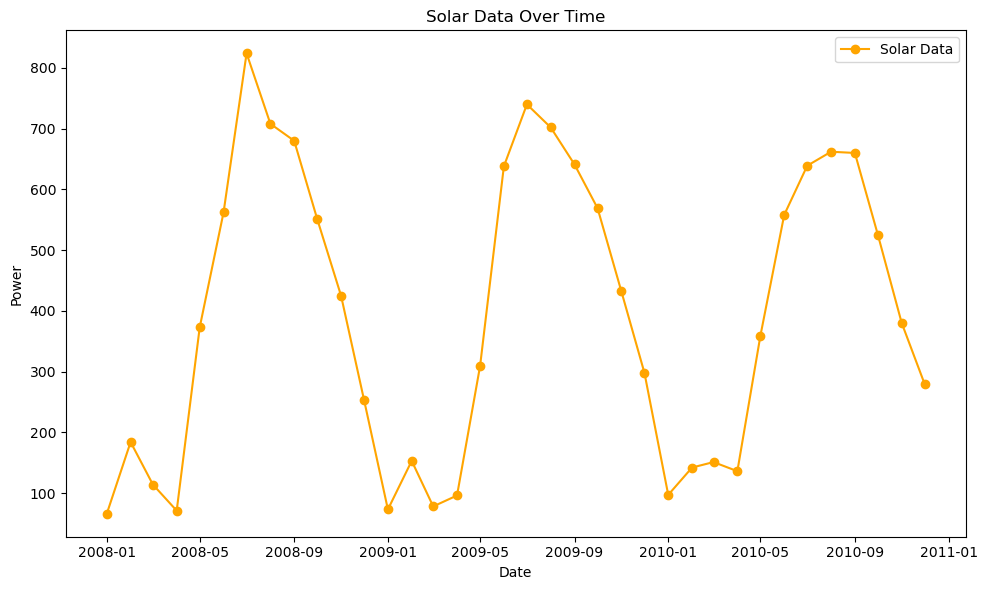

In [9]:
# Plot solar data where time is year and month, and power is the value
# Combine 'year' and 'month' into a datetime column
df_solar['date'] = pd.to_datetime(df_solar[['year', 'month']].assign(day=1))

# Plot using the new datetime column
plt.figure(figsize=(10, 6))
plt.plot(df_solar['date'], df_solar['power'],'o-', label='Solar Data', color='orange')
plt.title('Solar Data Over Time')
plt.xlabel('Date')
plt.ylabel('Power')
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
# Introduce X_t = log(Y_T) - mu
X_t = np.log(df_solar['power']) - mu

# Calculate the mean and variance of X_t
mean_X_t = np.mean(X_t)
var_X_t = np.var(X_t)

# Re-write the model to calculate the residuals
X_t = X_t - mean_X_t
X_t = X_t / np.sqrt(var_X_t)


In [ ]:
# Calculate the covariance matrix
cov_X_t = np.cov(X_t)
# Calculate the correlation matrix
corr_X_t = np.corrcoef(X_t)
# Calculate the autocorrelation function
acf_X_t = acf(X_t, nlags=40)
# Calculate the partial autocorrelation function
pacf_X_t = pacf(X_t, nlags=40)
# Plot the autocorrelation function
plt.figure(figsize=(10, 6))
plt.subplot(211)
plt.plot(acf_X_t, marker='o', linestyle='-', color='blue')
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid()
plt.subplot(212)
plt.plot(pacf_X_t, marker='o', linestyle='-', color='red')
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.grid()
plt.tight_layout()
plt.show()